## 作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可將低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)

包含客戶特徵

- Account Balance(帳戶餘額): 沒有帳號(1), 沒有餘額 (2), 部分存款 (3)
- Payment Status(付款狀況): 有問題 (1), 付清 (2), 於該銀行沒有問題(3)
- Savings/Stock Value (存款): 沒有, 少於 100, 100 ~ 1,000, 高於1,000
- Employment Length(工作長短): 少於 1 年, 1 ~ 4年, 4 ~ 7年, 高於 7 年
- Sex/Marital Status(性別與婚姻): 男生/女生, 單身/離婚/已婚/鰥夫
- No of Credits at this bank(貸款數): 1, >1
- Guarantor(保人): None, Yes
- Concurrent Credits(其他貸款數): 其他銀行或百貨, None
- ForeignWorker (外國工作者)
- Purpose of Credit(貸款目的): New car, Used car, Home Related, Other
預測目標

- Creditability (可信客戶): 1/0


請用Python 回答以下問題：

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請將資料分為訓練與測試資料集,其中訓練資料集占80%, 測試資料集占20%
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請使用隨機森林建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?
- 請求出混淆矩陣(Confusion Matrix)?
- 請繪製隨機森林模型與的邏輯式迴歸 ROC Curve, 並比較兩者的 AUC?

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [4]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [5]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [0]:
from sklearn.model_selection import train_test_split
y = df.iloc[:,0]
X = df.iloc[:,1:]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [8]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((400, 20), (100, 20), (400,), (100,))

In [20]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter = 1000)
clf1.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=1000, max_depth = 5)
clf2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predicted1 = clf1.predict(test_X)
predicted2 = clf2.predict(test_X)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted1)

0.71

In [32]:
confusion_matrix(test_y, predicted1)

array([[10, 21],
       [ 8, 61]])

In [33]:
accuracy_score(test_y, predicted2)

0.73

In [34]:
confusion_matrix(test_y, predicted2)

array([[ 6, 25],
       [ 2, 67]])

In [0]:
predicted1_prob = clf1.predict_proba(test_X)
predicted2_prob = clf2.predict_proba(test_X)

In [0]:
from sklearn.metrics import auc, roc_curve
fpr1, tpr1, threshold1 = roc_curve(test_y , predicted1_prob[:,1])
auc1 = auc(fpr1, tpr1)

In [0]:
from sklearn.metrics import auc, roc_curve
fpr2, tpr2, threshold2 = roc_curve(test_y , predicted2_prob[:,1])
auc2 = auc(fpr2, tpr2)

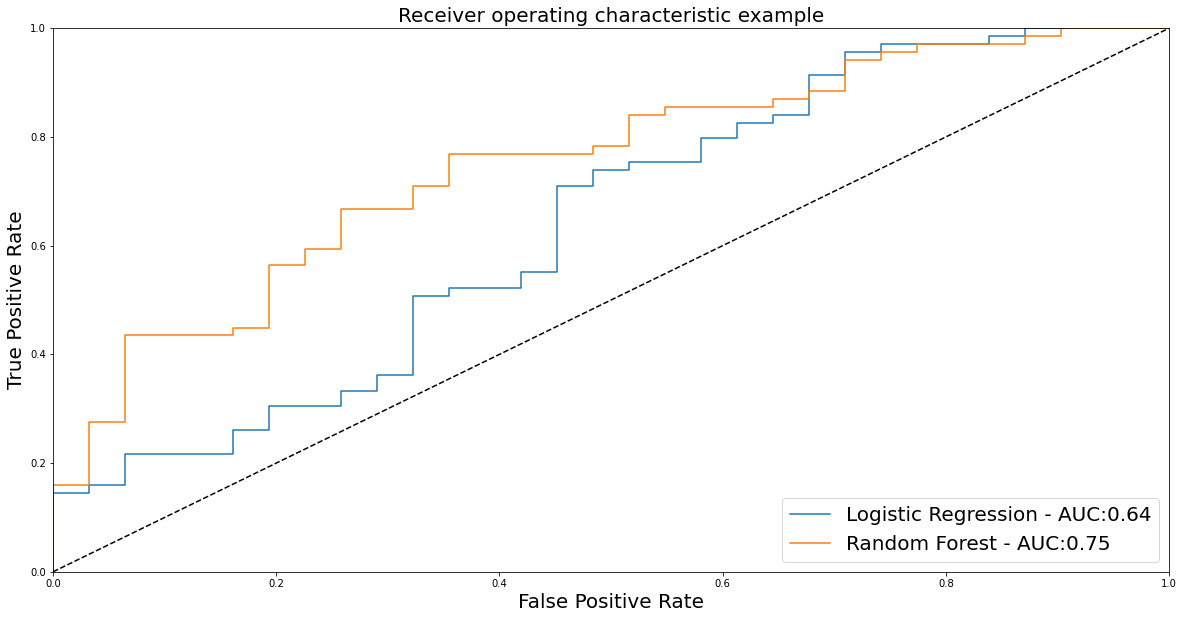

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize= [20,10])
plt.plot(fpr1, tpr1, label='%s - AUC:%.2f'%('Logistic Regression', auc1) )
plt.plot(fpr2, tpr2, label='%s - AUC:%.2f'%('Random Forest', auc2) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 借貸俱樂部資料分析
- https://drive.google.com/open?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

In [52]:
! gdown https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

Downloading...
From: https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo
To: /content/LoanStats3b.csv.zip
36.6MB [00:00, 70.9MB/s]


In [53]:
! unzip LoanStats3b.csv.zip

Archive:  LoanStats3b.csv.zip
  inflating: LoanStats3b.csv         


### 資料讀取

In [281]:
import pandas as pd
#讀取資料
dataset = pd.read_csv('LoanStats3b.csv', skiprows=[0])
dataset.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47,123,124,125,128,129,130,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 208.2+ MB



### 資料預先處理

In [282]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [283]:
dataset.isna().sum()

id                       188181
member_id                188183
loan_amnt                     2
funded_amnt                   2
funded_amnt_inv               2
                          ...  
settlement_status        186132
settlement_date          186132
settlement_amount        186132
settlement_percentage    186132
settlement_term          186132
Length: 145, dtype: int64

In [284]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan], dtype=object)

In [0]:
#移除空白欄位
dataset = dataset.iloc[:,2:111]
empty_cols = [i for i in range(45,72)]
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
data_with_loanstatus_sliced = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [228]:
data_with_loanstatus_sliced.shape

(188171, 82)

In [229]:
data_with_loanstatus_sliced.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
                                   ...  
revol_bal                              0
pub_rec                                0
open_acc                               0
inq_last_6mths                         0
loan_amnt                              0
Length: 82, dtype: int64

In [0]:

di = {"Fully Paid":0, "Charged Off":1}   
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})

In [0]:

dataset=Dataset_withBoolTarget

In [0]:
del_col_names = ["delinq_2yrs", "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title",
"term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line",
"initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m",
"num_accts_ever_120_pd", "delinq_amnt",
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"]

In [0]:
dataset = dataset.drop(labels = del_col_names, axis = 1)

In [290]:
dataset.shape

(188171, 60)

In [292]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] #'sub_grade' #selecting final features #'addr_state''tax_liens',
Final_data = dataset[features] #19 features with target var
Final_data["int_rate"] = Final_data["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (188171, 18)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [293]:

Final_data.select_dtypes('object').head()

,emp_length,home_ownership,grade
0,3 years,MORTGAGE,A
1,10+ years,OWN,B
2,10+ years,MORTGAGE,B
3,5 years,MORTGAGE,A
4,4 years,RENT,B


### 將字串欄位改變成數值型態

In [0]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [0]:
Final_data["home_ownership"] =  Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

In [296]:

Final_data["emp_length"] = Final_data["emp_length"].fillna('0')
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:int(x))
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (188171, 18)


In [297]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188171 entries, 0 to 188170
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            188171 non-null  float64
 1   emp_length             188171 non-null  int64  
 2   annual_inc             188171 non-null  float64
 3   home_ownership         188171 non-null  int64  
 4   grade                  188171 non-null  int64  
 5   last_pymnt_amnt        188171 non-null  float64
 6   mort_acc               180676 non-null  float64
 7   pub_rec                188171 non-null  float64
 8   int_rate               188171 non-null  float64
 9   open_acc               188171 non-null  float64
 10  num_actv_rev_tl        160430 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  160429 non-null  float64
 12  mo_sin_old_rev_tl_op   160429 non-null  float64
 13  bc_util                179059 non-null  float64
 14  bc_open_to_buy         179146 non-nu

In [298]:
Final_data.head(3)

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0


In [299]:
Final_data.isna().sum().sort_values(ascending = False)

avg_cur_bal              27747
mo_sin_old_rev_tl_op     27742
mo_sin_rcnt_rev_tl_op    27742
num_actv_rev_tl          27741
bc_util                   9112
bc_open_to_buy            9025
acc_open_past_24mths      7495
mort_acc                  7495
loan_status                  0
grade                        0
emp_length                   0
annual_inc                   0
home_ownership               0
int_rate                     0
last_pymnt_amnt              0
pub_rec                      0
open_acc                     0
funded_amnt                  0
dtype: int64

In [0]:
Final_data.fillna(Final_data.mean(), inplace=True)

In [301]:
Final_data.isna().sum().sort_values(ascending = False)

loan_status              0
acc_open_past_24mths     0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
funded_amnt              0
dtype: int64

### 資料標準化

In [302]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5,325000.0,6,7,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4,60000.0,5,6,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


### 資料標準化

In [303]:
from sklearn import preprocessing,metrics 
scl = preprocessing.StandardScaler()  # (x - u) / std
fields = Final_data.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean['loan_status'] = Final_data['loan_status']
data_clean['loan_status'].value_counts()

0    158503
1     29668
Name: loan_status, dtype: int64

In [304]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.289865,-0.808437,0.468263,0.882600,1.364207,-0.212603,-0.377328,-0.261387,-1.500497,1.302047,-0.250578,-0.275500,-0.743709,0.654446,-0.452853,-0.133081,0.027086,0
1,1.565265,1.139246,-0.332513,-2.226577,0.587619,0.325463,1.018453,-0.261387,-0.741023,0.650935,-0.621610,0.126864,1.813711,-0.507619,0.638622,-0.279377,-0.357007,0
2,-0.289865,1.139246,1.114672,0.882600,0.587619,-0.645000,0.553193,-0.261387,-0.515660,-0.434251,-0.250578,-0.677865,0.178438,1.027406,-0.365268,1.491777,0.027086,0
3,1.682366,-0.251956,4.877352,0.882600,1.364207,3.376020,1.483714,-0.261387,-1.500497,0.867972,-0.250578,-0.610804,0.621068,0.010599,0.438560,2.611904,0.795272,0
4,-0.289865,-0.530196,-0.236034,-0.671988,0.587619,-0.067556,-0.842589,-0.261387,-0.741023,0.867972,0.491487,-0.879047,-1.604380,-1.999458,0.540847,-0.880559,1.563458,0


In [0]:
data_clean.dropna(inplace=True)

### 資料重取樣

In [306]:
data_clean['loan_status'].value_counts()

0    158503
1     29668
Name: loan_status, dtype: int64

In [0]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]

In [308]:
subset_of_loanstatus_0 = loanstatus_0.sample(n=1000)
subset_of_loanstatus_1 = loanstatus_1.sample(n=1000)
data_clean = pd.concat([subset_of_loanstatus_1,subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
data_clean.shape

(2000, 18)

In [0]:
#data_clean.head()

In [329]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
accuracy_score(y_test, predicted)

0.8118181818181818

In [0]:
acc = []
for recnum in range(500,6500,500):
  subset_of_loanstatus_0 = loanstatus_0.sample(n=recnum)
  subset_of_loanstatus_1 = loanstatus_1.sample(n=recnum)
  data_clean = pd.concat([subset_of_loanstatus_1,subset_of_loanstatus_0])
  data_clean = data_clean.sample(frac=1).reset_index(drop=True)
  clf = LogisticRegression()
  X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
  clf.fit(X_train,y_train)
  predicted = clf.predict(X_test)
  acc.append(accuracy_score(y_test, predicted))

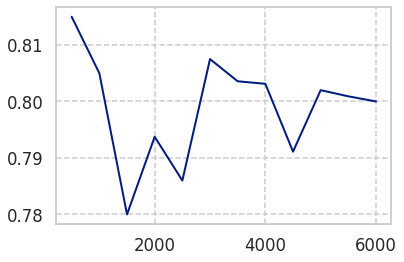

In [331]:
plt.plot(range(500,6500,500), acc)

In [332]:
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1,subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
data_clean.shape

(11000, 18)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)


In [334]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8800, 17), (2200, 17), (8800,), (2200,))

###特徵篩選

In [335]:
from sklearn import linear_model,svm
from sklearn.feature_selection import RFE

# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True  True False False  True False False  True
  True  True  True False  True]
[1 5 1 6 1 1 8 2 1 7 4 1 1 1 1 3 1]


In [336]:
X_train.loc[:,rfe.support_].head()

,funded_amnt,annual_inc,grade,last_pymnt_amnt,int_rate,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,acc_open_past_24mths
10735,2.545217,0.825235,-1.742144,-0.048238,1.399928,-0.744925,-1.370769,0.356078,-0.378724,0.411179
5937,1.682366,0.612981,-0.188969,-0.594682,0.563830,-0.811986,-0.067468,-0.295620,-0.057473,0.027086
7642,-0.289865,-0.062372,0.587619,0.375295,-0.168600,-0.677865,-0.817481,-0.201399,0.564882,1.563458
3328,2.283280,0.728756,-1.742144,-0.499302,1.672618,-0.275500,0.092370,-1.347760,0.653712,0.795272
8681,1.337225,0.034107,-0.965556,-0.599685,1.226399,0.395107,0.350572,1.243330,-0.623902,-0.741100


In [337]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.16703519 0.15664063 0.12664634 0.07529328 0.07327141 0.05863801
 0.05608949 0.04835858 0.04379204 0.03924139]


In [0]:
features = ['funded_amnt','annual_inc','grade',"last_pymnt_amnt",
"int_rate","mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy","acc_open_past_24mths","loan_status"]
X_train, X_test = X_train[features[:-1]], X_test[features[:-1]]
data_clean = data_clean[features]

In [339]:
data_clean.shape

(11000, 11)

### 建立模型

In [340]:
from sklearn import linear_model
from sklearn.model_selection import  cross_val_score
from sklearn.feature_selection import RFE

clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
print(cross_val_score(clf_LR, X_train, y_train, cv=3))

[0.80334015 0.80463689 0.80395499]


In [0]:
from sklearn.model_selection import GridSearchCV

def cross_validation_best_parameters(model, param_grid):
  grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
  X=data_clean.iloc[:,:-1].values
  y=data_clean.iloc[:,-1].values
  grid.fit(X,y)
  #print()
  #print(dir(grid))
  #print(grid.cv_results_)
  #mean_scores = [result for result in grid.cv_results_.mean_test_score]
  return grid.best_score_,grid.best_estimator_


In [342]:
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
Best_Accuracy, Best_classifier =cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)


Best accuracy is 0.8021818181818181
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
  fpr, tpr, _ = metrics.roc_curve(truth,pred)
  roc_auc = metrics.auc(fpr, tpr)
  lw = 2
  c = (np.random.rand(), np.random.rand(), np.random.rand())
  plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve') #Receiver Operating Characteristic
  plt.legend(loc="lower right")


Logistic regression accuracy is  0.7945454545454546


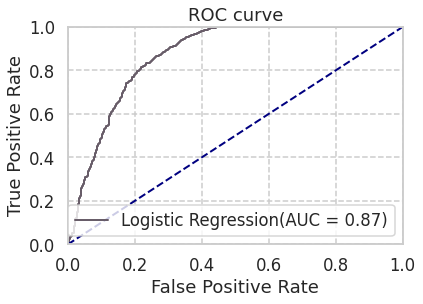

In [344]:
import numpy as np
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()


In [0]:
from sklearn.model_selection import GridSearchCV
clf_svm = svm.SVC()
powers = range(0,5)
cs = [10**i for i in powers]
param_grid = dict(C=cs)
grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')
grid.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
#grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print("---------------")
print(grid.best_estimator_)


In [345]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e5,hidden_layer_sizes=(5, 2), random_state=1)
clf_NN.fit(X_train,y_train)
predict_NN = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NNAccuracy = accuracy_score(y_test,predict_NN)
print(NNAccuracy)

0.49454545454545457


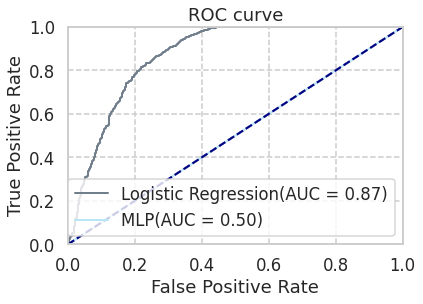

In [347]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
#plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,predictproba_NN,'MLP')
plt.show()


In [350]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=0)

maxFeatures = range(1,data_clean.shape[1]-1)

param_dist = dict(max_features=maxFeatures)

rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy',n_iter=len(maxFeatures), random_state=10)

X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values

rand.fit(X,y)

#mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [351]:
rand.best_estimator_.max_features

4

In [352]:
from sklearn.metrics import accuracy_score
randomForest = RandomForestClassifier(bootstrap=True,criterion =
"gini",max_features=rand.best_estimator_.max_features,random_state=0 )

randomForest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [353]:
rfPredict = randomForest.predict(X_test)
rfAccuracy = accuracy_score(y_test,rfPredict)
print(rfAccuracy)

0.7977272727272727


In [0]:
rfPredictproba = randomForest.predict_proba(X_test)[:,1]
roc_score = metrics.roc_auc_score(y_test,rfPredict)


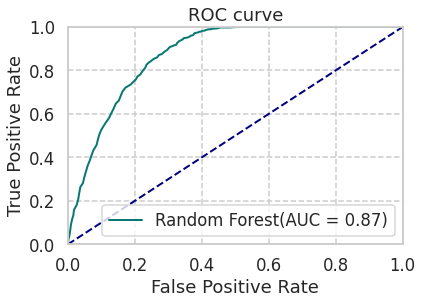

In [355]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()

In [356]:
randomForest.feature_importances_

array([0.06970922, 0.06971276, 0.02843439, 0.47373897, 0.08091761,
       0.04958558, 0.05981316, 0.0640999 , 0.06505637, 0.03893205])

Text(0, 0.5, 'Normalized Gini Importance')

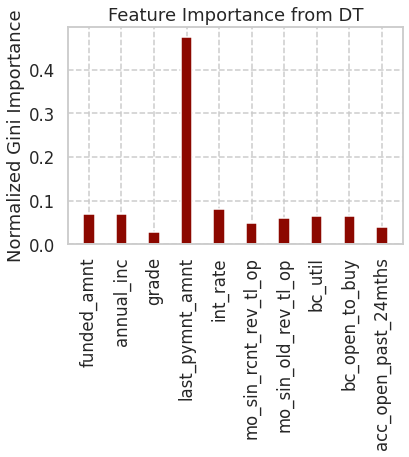

In [357]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

In [358]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
num_trees = 100
model = BaggingClassifier(base_estimator=randomForest,
n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KeyboardInterrupt: ignored

In [360]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
Ada_clf = AdaBoostClassifier(n_estimators=50)
scores = cross_val_score(Ada_clf, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values)
scores.mean()

0.8056363636363637

### XGBoost

In [361]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [363]:
dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[04:27:38] 8800x10 matrix with 87646 entries loaded from dtrain.svm
[04:27:38] 2200x10 matrix with 21892 entries loaded from dtest.svm


In [364]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
preds[0:3,:]

array([[0.25506184, 0.7449382 ],
       [0.20143421, 0.7985658 ],
       [0.1451544 , 0.8548456 ]], dtype=float32)

In [365]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 1, 1, ..., 1, 0, 1])

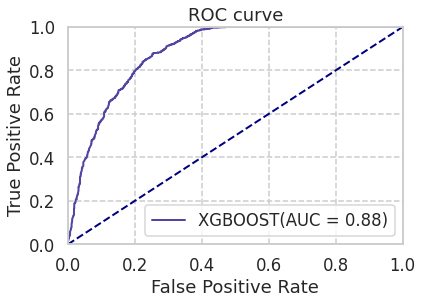

In [366]:

xgboost_predict = preds[:,1]
plotAUC(y_test,xgboost_predict,'XGBOOST')

In [369]:
from sklearn.metrics import classification_report
print("RF",classification_report(y_test, rfPredict, target_names=None))
print("XGBoost",classification_report(y_test, best_preds, target_names=None))
print("LR",classification_report(y_test, LR_Predict_bin, target_names=None))

RF               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1112
           1       0.75      0.89      0.81      1088

    accuracy                           0.80      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.81      0.80      0.80      2200

XGBoost               precision    recall  f1-score   support

           0       0.91      0.67      0.77      1112
           1       0.73      0.93      0.82      1088

    accuracy                           0.80      2200
   macro avg       0.82      0.80      0.80      2200
weighted avg       0.82      0.80      0.80      2200

LR               precision    recall  f1-score   support

           0       0.89      0.68      0.77      1112
           1       0.73      0.92      0.82      1088

    accuracy                           0.79      2200
   macro avg       0.81      0.80      0.79      2200
weighted avg       0.81      0.79      0.79      2200



In [0]:
import lightgbm as lgb


In [0]:
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)

In [0]:
gbm = lgb.LGBMClassifier(
    boosting_type = 'gbdt'
)

In [377]:
gbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
predicted = gbm.predict(X_test)

In [380]:
accuracy_score(y_test,predicted)

0.8059090909090909

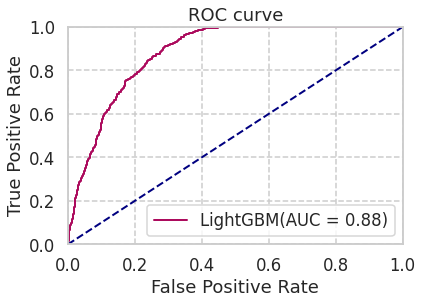

In [381]:
lightgbm_predict = gbm.predict_proba(X_test)[:,1]
plotAUC(y_test,lightgbm_predict,'LightGBM')

## 文字探勘

In [383]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

In [386]:
s = '''美國總統川普（Donald Trump）日前表示，若WHO不實質改革的話，不但會中斷資金，也會退出這個組織，而他也在5月29日以中國完全掌控世衛組織、以及世衛組織拒絕改革為由，宣布中止與世衛組織的關係。'''
import re
re.split('[，、。]',s)

['美國總統川普（Donald Trump）日前表示',
 '若WHO不實質改革的話',
 '不但會中斷資金',
 '也會退出這個組織',
 '而他也在5月29日以中國完全掌控世衛組織',
 '以及世衛組織拒絕改革為由',
 '宣布中止與世衛組織的關係',
 '']

In [388]:
import jieba
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認", cut_all=True)
print("Full Mode:", "/ ".join(seg_list))

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認", cut_all=False)
print("Default Mode:", "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.047 seconds.
Prefix dict has been built successfully.


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ ？/  / / 柯/ P/ 否/ 認
Default Mode: 大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/  / 柯/ P/ 否認
